DS TASK2 #PRODIGY INFOTECH

Task2:Perform EDA and find patterns and trends

Dataset from KAGGLE
Link: https://www.kaggle.com/c/titanic/data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the dataset 
df=pd.read_csv('C:/Users/SHINY/Downloads/titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.shape

(891, 12)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#checking the datatypes of all the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

DATA CLEANING

In [12]:
#checking for null/missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#checking which values has highest percentage of null values
df.isnull().sum().sort_values(ascending=False)*100/len(df)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

We observe that column Cabin has more values so we can drop them 

In [14]:
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.columns #checking if the column has dropped

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we can observe the dataset is clean and we can proceed with EDA

EDA

In [17]:
#Finding unique values of each column
df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [18]:
#Checking the unique values of some columns
df['Survived'].unique()

array([0, 1], dtype=int64)

The two values indicate whether the person is dead or survived

In [19]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [20]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [21]:
#columns which are unnecessary can be dropped
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

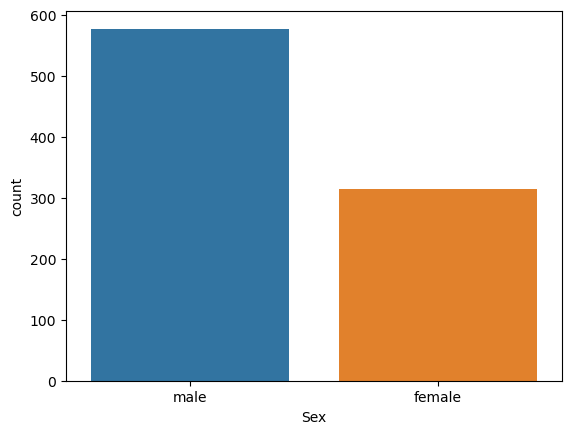

In [22]:
#plotting for Sex column
sns.countplot(x=df['Sex'])
plt.show()

From the graph we can observe that Male passengers are more than female 

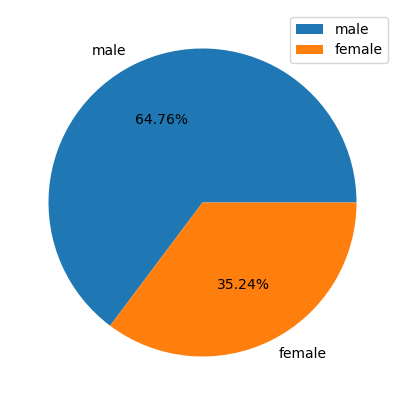

In [26]:
#to find the percentage of male and female we plot using pie chart
sv=df['Sex'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(sv.values,labels=sv.index,autopct='%.2f%%')
plt.legend()
plt.show()

<Axes: xlabel='Parch', ylabel='count'>

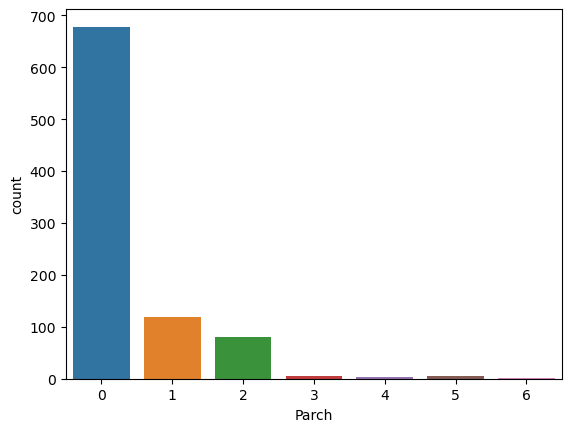

In [27]:
#checking the companion of passengers
sns.countplot (x ='Parch', data = df)

From this graph we can observe that many passengers travelled alone and some had one person with them and very few had 3,4,5 people with them

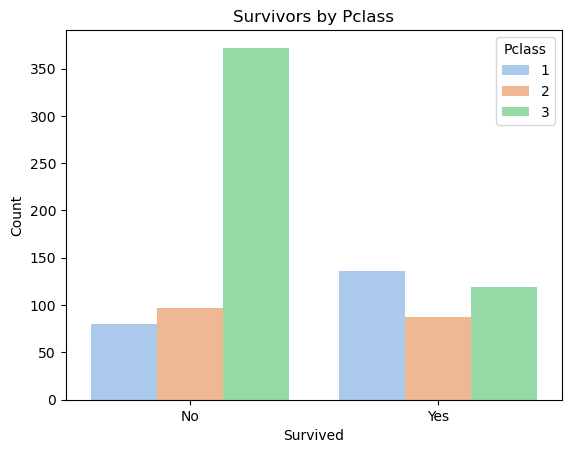

In [29]:
sns.countplot(data=df, x='Survived', hue='Pclass', palette='pastel')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survivors by Pclass')

plt.show()

Here we can see that according to Pclass how many people survived accordingly in each class.We can see that in P3 class many are not able to survive so the company should make proper precautions in P3 class

<Axes: >

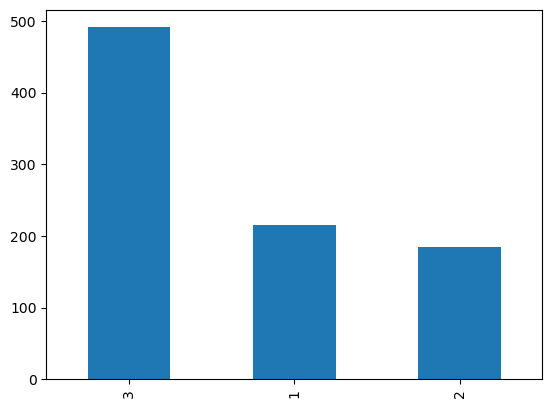

In [30]:
pd.value_counts(df["Pclass"]).plot.bar()

We can see that many passengers prefer 3rd class maybe because of cost but safety is not that much in 3rd class so it must be improved.And the next preferred is 1st class maybe because of comfort and safety.

In [34]:
df_cor=df.corr()
df_cor

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

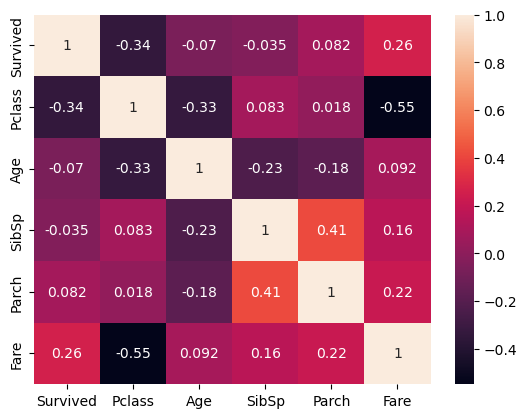

In [37]:
sns.heatmap(df_cor,annot=True)

Here we can observe positive and negative correlation between each columns, 
~if we take Age and Survived it has negative correlation which means if the age is more chance of survival is less 
~if we observe age and fare they have a positive correlation that means small children will have less fare and middle aged people will have higher fare than children